In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from perses.analysis import fah_plotting
import os

In [2]:
with open('2020-08-14-nucleophilic-displacement-results_complex-PROJ13422_solvent-PROJ13423.json', 'r') as f:
    output = json.load(f)
    
ligands = {}

In [3]:
results_sets = {}
expanding_stereochemistry = {}
for k in output:
    protein = k['details']['protein']
    ligand = k['details']['ligand']
    if (protein, ligand) not in results_sets:
        results_sets[(protein, ligand)] = {}
    
    title = k['details']['start_title']
    fe = k['analysis']['binding']['delta_f']
    dfe = k['analysis']['binding']['ddelta_f']
    if title in results_sets[(protein, ligand)]:
        ## We have another enantiomer
        if fe < results_sets[(protein, ligand)][title][0]:
            results_sets[(protein, ligand)][title] = (fe, dfe) # if it's better, replace it
    else:
        results_sets[(protein, ligand)][title] = (fe, dfe)
    if title not in expanding_stereochemistry:
        expanding_stereochemistry[title] = {k['details']['start_smiles']:(fe, dfe)}
    else:
        expanding_stereochemistry[title][k['details']['start_smiles']] = (fe, dfe)
plt.show()

In [4]:
nope = []
for title, values in expanding_stereochemistry.items():
    if len(values) == 1:
        nope.append(title)
        
for title in nope:
    del expanding_stereochemistry[title]
print(f'{len(expanding_stereochemistry)} molecules with enantiomers')

49 molecules with enantiomers


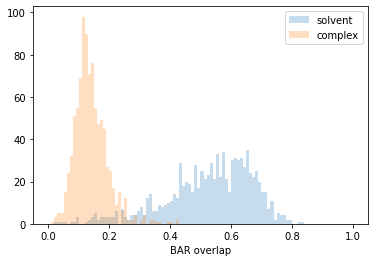

In [5]:
bins = np.linspace(0.,1.,101)
bar_overlaps = [k['analysis']['solvent_phase']['bar_overlap'] for k in output]
plt.hist(bar_overlaps,label='solvent',bins=bins,alpha=0.25)
bar_overlaps = [k['analysis']['complex_phase']['bar_overlap'] for k in output]
plt.hist(bar_overlaps,label='complex',bins=bins,alpha=0.25)
plt.legend()
plt.xlabel('BAR overlap')
plt.show()

In [6]:
for k in output:
    for x in k:
        print(x)
        print(k[x].keys())
        for y in k[x].keys():
            if isinstance(k[x][y], dict):
                print(k[x][y].keys())
    break

details
dict_keys(['JOBID', 'directory', 'end', 'end_pIC50', 'end_smiles', 'end_title', 'ff', 'ligand', 'protein', 'start', 'start_smiles', 'start_title', 'target'])
analysis
dict_keys(['complex_phase', 'solvent_phase', 'binding'])
dict_keys(['delta_f', 'ddelta_f', 'bar_overlap', 'num_work_values'])
dict_keys(['delta_f', 'ddelta_f', 'bar_overlap', 'num_work_values'])
dict_keys(['delta_f', 'ddelta_f'])


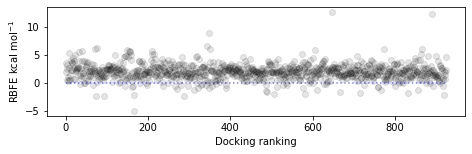

In [7]:
plt.figure(figsize=(7.5,2))
for i, k in enumerate(output):
    fe = k['analysis']['binding']['delta_f']
    dfe = k['analysis']['binding']['ddelta_f']
    plt.scatter(i, fe,color='k',alpha=0.1)
#     if dfe is not None:
#         plt.vlines(i, fe-dfe, fe+dfe,color='purple')
plt.hlines(0.,0.,i,color='blue',linestyle='dotted', alpha=0.5)
plt.xlabel('Docking ranking')
plt.ylabel('RBFE '+r'kcal mol$^{-1}$')
plt.show()

In [8]:
for title, enantiomers in expanding_stereochemistry.items():
    print(title, enantiomers.values())

EN300-784608 dict_values([(3.5535820907261524, 0.5463400288977915), (0.6515613721035223, 0.5829751300260753)])
EN300-1613321 dict_values([(2.69800837246612, 0.23624121938434908), (2.0921090090300822, 0.2287263078048282)])
EN300-241941 dict_values([(5.537739628655196, 0.47556169501164003), (3.7708373442102783, 0.5010156873446612)])
EN300-1719615 dict_values([(1.3032461546632277, 0.14257860790378596), (1.6190766339921119, 0.16472321467439882)])
EN300-1910385 dict_values([(0.43600151760575656, 0.2205912463677369), (-0.24091088920315684, 0.19315016620637787)])
EN300-1281011 dict_values([(2.2215727841643798, 0.24179179668313985), (2.342144829116023, 0.2581869010192351), (2.6821247750153816, 0.263251601105284), (3.7655715930235942, 0.2685754570376657)])
EN300-784558 dict_values([(6.1453832754084985, 0.28949463724445723), (2.3241151850481714, 0.3318989682269319)])
EN300-382177 dict_values([(2.1401233321037836, 0.1987985395739297), (1.908837227656818, 0.1944971690549968)])
EN300-1910456 dict_v

('../receptors/monomer/Mpro-x2646_0_bound-protein-thiolate.pdb', 'nucleophilic_displacement_enumeration_for_FEP-sorted-x10789.sdf')
N: 858


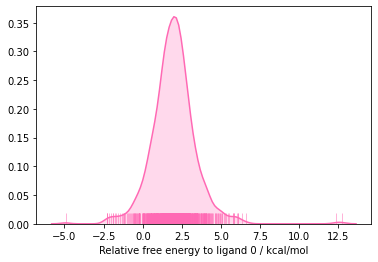

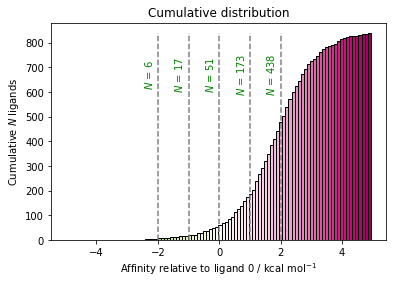

In [9]:
for res in results_sets:
    print(res)
    print(f'N: {len(results_sets[res])}')
    fah_plotting.plot_relative_distribution([x[0] for x in results_sets[res].values()])
    plt.show()
    fah_plotting.plot_cumulative_distributions([x[0] for x in results_sets[res].values()])
    plt.show()

In [10]:
def _kT_to_kcal(value):
    if isinstance(value,float):
        return (value*kT).value_in_unit(unit.kilocalories_per_mole)
    else:
        return [(x*kT).value_in_unit(unit.kilocalories_per_mole) for x in value]

In [11]:
# def _get_best_number(ligand_result, n=10):
#     '''
#     This will return the best $N$ ligands from the set, where best is defined as lowest affinity
    
#     ligand_result: dict(ligand_index: free energy)
#         dictionary of ligand indices/titles/names to relative free energy compared to single point
#     n: int, optional default=10
#         number of ligands to return
        
#     Returns
#     -------
    
#     list(tuple(ligand_index : free energy)) ### maybe we just want to return the sorted list of ligand indeces?
        
#     '''
#     assert len(ligand_result) < n , 'Fewer than n ({n}) ligands provided'
#     return sorted(ligand_result.items(), key=lambda kv: kv[1])[0:n]

# def _get_best_percent(ligand_result, p=10.):
#     '''
#     This will return the best p% ligands from the set, where best is defined as lowest affinity
    
#     ligand_result: dict(ligand_index: free energy)
#         dictionary of ligand indices/titles/names to relative free energy compared to single point
#     p: float, optional default=10.
#         percentage of dataset to return
        
#     Returns
#     -------
    
#     list(tuple(ligand_index : free energy)) ### maybe we just want to return the sorted list of ligand indeces?
        
#     '''
#     assert 0. < p < 100., f'Percentage must be between 0 and 100 %, percentage {p} not in range'
#     n = int(len(ligand_result) * (p/100))
#     return sorted(ligand_result.items(), key=lambda kv: kv[1])[0:n]

def _get_better_than(ligand_result, threshold=0.):
    '''
    This will return all ligands with affinity lower than a threshold
    
    ligand_result: dict(ligand_index: free energy)
        dictionary of ligand indices/titles/names to relative free energy compared to single point
    threshold: float, optional default=0.
        will return all ligands with affinity better or equal to 0.0
        
    Returns
    -------
    
    list(tuple(ligand_index : free energy)) ### maybe we just want to return the sorted list of ligand indeces?
        
    '''
    return [(k,v) for k,v in ligand_result.items() if v[0] <= threshold]

In [12]:
# import mdtraj as md

# def _find_lowest_work(work, run, proj='13420',forward=True):
#     # work = dataframe
#     # run is the 'RUNXX' as a string
#     # proj is the project ID as a string
#     # forward is True if we want to get the value for the NEW ligand
#     # forward is False means backwards so that value for the OLD ligand
#     # returns the strings of the integers for clone and gen, but could also just pass back the whole string as 'CLONEX' 'GENY'
#     filter_works = work[(work['PROJ']==f'PROJ{proj}')]
#     filter_works = filter_works[(filter_works['RUN']==run)]
#     if forward == True:
#         lowest_work_df = filter_works[filter_works.reverse_work == filter_works.forward_work.min()]
#     else:
#         lowest_work_df = filter_works[filter_works.reverse_work == filter_works.reverse_work.min()]

#     # TODO there is no way that there isn't a better way to do this with pandas
#     try:
#         clone = list(lowest_work_df['CLONE'])[0]
#         gen = list(lowest_work_df['GEN'])[0]
#     except:
#         print(f'something has gone wrong with {run}')
#         return 0, 0
#     return clone[5:], gen[3:]

# def get_structure(proj,RUNID,GEN,CLONE,filename='',forwards=True,n_atoms=None):  
#     ### TODO --- this will currently only work for looking at OLD ligands
#     ### as we need to know the number of atoms to work out which correspond to the old ligand this is a hack
#     ### really need the old_to_hybrid or new_to_hybrid mapping for this to work as it should
    
#     # frame 0 is start ligand after EQUIL
#     # 0 -> 1 NEQ
#     # frame 1 is end ligand after NEQ
#     # frame 2 is end ligand after EQ
#     # 1 -> 0 NEQ
#     # frame 3 is start ligand after NEQ
    
#     # TODO - still not 100% sure this is exactly what we want
#     if forwards:
#         frame = 1
#     else:
#         frame = 3
        
#     # RSYNC, or doing this as a batch might be faster
#     try:
#         os.system(f'scp server@aws3.foldingathome.org:/home/server/server2/projects/{proj}/RUNS/{RUNID}/*pdb {RUNID}.pdb')
#         topology = md.load(f'{RUNID}.pdb').topology
#     except OSError:
#         print('no pdb file found')
#         return None, None

#     try:
#         os.system(f'scp server@aws3.foldingathome.org:/home/server/server2/data/SVR314342810/PROJ{proj}/{RUNID}/CLONE{CLONE}/results{GEN}/*xtc pos_{RUNID}.xtc')
#         traj = md.load_xtc(f'pos_{RUNID}.xtc',topology,frame=frame)
#     except ValueError:
#         print(f'error for clone {CLONE} gen {GEN}')
#         return None, None
#     except OSError:
#         print('no xtc file found')
#         return None, None
        

#     # find the atom indices for the ligand (resname 'MOL')
#     if n_atoms is not None:  
#         atoms = [i for i in range(topology.n_atoms)]
#         mol_ids = []
#         for res in topology.residues:
#             if res.name == 'MOL':
#                 for atom in res.atoms:
#                     if len(mol_ids) < n_atoms:
#                         mol_ids.append(atom.index)
#                     else:
#                         # removing the unique-new atoms, as they are the last in the list of the hybrid topology
#                         # really need a way to do this for the other way
#                         atoms.remove(atom.index)
#         # this deletes the unique-new from traj in place
#         traj.atom_slice(atoms, inplace=True)
#     # this puts the protein:ligand in the center of the box
#     traj.image_molecules()
    
#     # removes solvent (i.e. the ions) as water isn't saved anyway
#     traj.remove_solvent(inplace=True)
    
#     # now save it
#     traj.save_pdb(filename)

#     mol_N = []
#     mol_O = []
#     his_N = []
#     glu_N = []
#     for residue in traj.topology.residues:
#         if residue.name == 'MOL':
#             for atom in residue.atoms:
#                 if str(atom.element) == 'nitrogen':
#                     mol_N.append(atom.index)
#                 if str(atom.element) == 'oxygen':
#                     mol_O.append(atom.index)
#         elif residue.index == 166:
#             for atom in residue.atoms:
#                 if str(atom.element) == 'nitrogen':
#                     glu_N.append(atom.index)
#         elif residue.index == 163:
#             for atom in residue.atoms:
#                 if str(atom.element) != 'nitrogen':
#                     his_N.append(atom.index)

#     atom_pairs = []
#     for i in mol_N:
#         for j in his_N:
#             atom_pairs.append((i,j))
#     his_dist = min(md.compute_distances(traj, atom_pairs)[0])*10.


#     atom_pairs = []
#     for i in mol_O:
#         for j in glu_N:
#             atom_pairs.append((i,j))
#     glu_dist = min(md.compute_distances(traj, atom_pairs)[0])*10.

    
#     # now doing cleanup
#     os.system(f'rm {RUNID}.pdb')
#     os.system(f'rm pos_{RUNID}.xtc')
    
#     return his_dist, glu_dist 

In [13]:
from openeye import oedepict
from openeye import oechem

def make_image_with_ligs(ligands,molecules,folder,filename):
    # ligands is the list of tuples of ligand NAME and free energy
    # molecules is the list of openforcefield.Topology.Molecules
    # filename is where to save it. pdf is better for zooming
    
    # this bit works out what size square the ligands can fit into
    n = len(ligands)
    sq = int(np.ceil(n**0.5)) # round up the square root of n_ligands
    
    
    # this will make a huge file if loads of ligands are passed in, so maybe some sort of scaling?
    image = oedepict.OEImage(sq*200, sq*200)

    rows, cols = sq,sq
    grid = oedepict.OEImageGrid(image, rows, cols)

    opts = oedepict.OE2DMolDisplayOptions(grid.GetCellWidth(), grid.GetCellHeight(),
                                           oedepict.OEScale_AutoScale)


    with open(f'{folder}/setup.pml','w') as f:    
        for (name,fe), cell in zip(sorted(ligands, key=lambda i: float(i[1][0])), grid.GetCells()):
            for x in molecules:
                if x.name == name:
                    mol = x
            mol = mol.to_openeye()
            mol_name = mol.GetTitle()
            mol.SetTitle(f'{mol_name} {fe[0]:.1f} ({fe[1]:.1f})')
            oedepict.OEPrepareDepiction(mol)
            disp = oedepict.OE2DMolDisplay(mol, opts)
            oedepict.OERenderMolecule(cell, disp)
            f.write(f'load {mol_name}-{folder}.pdb \n')
        
        f.write(f'extra_fit resi [187-192,164-168,140-145], {mol_name}-{folder}, super, object=aln_super \n')   
        f.write('set cartoon_color, gray\n')
        f.write('hide spheres\n')
        f.write('hide (h. and (e. c extend 1))\n')
        f.write('set cartoon_transparency, 0.5 \n')
        f.write('sele ligands, resn MOL \n')
        f.write('sele GLU, resid 166 \n')
        f.write('sele HIS, resid 41 \n')
        f.write('show licorice, GLU \n')
        f.write('show licorice, HIS \n')
        f.write('orient ligands \n')
        f.write('delete aln_super \n')
        f.write('save ligands.sdf, ligands\n')
        f.write('bg_color white\n')        
    oedepict.OEWriteImage(f'{folder}/{filename}', image)

In [15]:
def get_details_from_output(output, match, vtype='details',value='start_title'):
    for d in output:
        if d[vtype][value] == match:
            return d
        

In [17]:
from openforcefield.topology import Molecule
from rdkit.Chem.Draw import IPythonConsole

with open('results.csv','w') as f:
    f.write('SMILES, TITLE, Smiles, Title, RBFE / kcalmol\n')
    # TO ADD --- ligand scaffold RMSD!!!
    # others? MW? Affinity of enumerated stereoisomers? dockscore?

for details, results in results_sets.items():
    ligand = details[1] 
    if ligand not in ligands:
        molecules = Molecule.from_file(f'../../covid-moonshot/synthetic-enumeration/{ligand}',allow_undefined_stereo=True)
        ligands[ligand] = molecules
    else:
        molecules = ligands[ligand]    

    best_ligands_for_set = _get_better_than(results,threshold=-1.)

    folder = 'sprint2results'
    if not os.path.exists(folder):
        os.makedirs(folder)

    #     make_image_with_ligs(best_ligands_for_set,ligands[ligand],filename=f'Best{folder}.pdf',folder=folder)
    best_ligands_for_set = sorted(best_ligands_for_set, key=lambda x:x[1])

    for i in best_ligands_for_set:
        if i[0] in expanding_stereochemistry.keys():
            print(f'{i[0]} has enantiomers')
            q = expanding_stereochemistry[i[0]]
            smi = min(q, key=q.get)
            ### Now need to get the RUN that this comes from
            d = get_details_from_output(output,smi,value='start_smiles')
        else:
            d = get_details_from_output(output,i[0],value='start_title')
            smi = d['details']['start_smiles']
        print(d['details']['directory'])
        ### Now need to get the RUN that this comes from
#             d = get_details_from_output(output,smi,value='start_smiles')
        with open('results.csv','a') as f:
            f.write(f"{d['details']['start_smiles']}, {d['details']['start_title']},{d['details']['start_smiles']}, {d['details']['start_title']},{i[1][0]:.1f},{i[1][1]:.1f}\n")                        

#             print(f'Lowest smiles is {sorted(expanding_stereochemistry[i[0]].keys(), key=lambda x: enantiomers[x][0])[0]}')
#     for d in output:

#         if d['details']['start_title'] in ligand_titles:
#             mol = None
#             for x in molecules:
#                 if x.name == d['details']['start_title']:
#                     mol = x
#             if mol is None:
#                 print('error with')
#             with open('results.csv','a') as f:
#                 f.write(f"{d['details']['start_smiles']}, {d['details']['start_title']},{d['details']['start_smiles']}, {d['details']['start_title']}, 0., 0.\n")

### NEED TO FIX THIS TODAY
#             clone, gen = _find_lowest_work(work,d['directory'],forward=False)
#             his_dist, glu_dist = get_structure(13422,d['details']['directory'],0,0,filename=f'{folder}/{mol.name}-{folder}.pdb',forwards=False,n_atoms=mol.n_atoms)                


RUN176
RUN88
EN300-1940535 has enantiomers
RUN106
EN300-330332 has enantiomers
RUN324
RUN180
RUN997
RUN566
RUN645
RUN907
RUN786
RUN735
RUN548
RUN547
RUN678
RUN838
RUN933
RUN348


### looking at redundant molecules (i.e. same smiles)

In [ ]:
# c = Counter([mol.to_smiles() for mol in molecules])

# fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5),sharey=True)
# for lig, (smi, count) in enumerate(c.most_common()):
#     if count > 1:
#         xlabels.append(smi)
#         for mol in molecules:
#             if mol.to_smiles() == smi:
#                 for d in details.values():
#                     try:
#                         if d['start_title'] == mol.name:
#                             if 'thiolate' in d['protein']:
#                                 ax = 1
#                             else:
#                                 ax = 0
#                             axes[ax].scatter(lig, d["DDG"],color='red',alpha=0.5)
#                             axes[ax].errorbar(lig, d["DDG"],yerr=d["dDDG"],color='red',alpha=0.5)
#                     except KeyError:
#                             continue
# axes[1].set_title('charged')
# axes[0].set_title('neutral')
# axes[0].set_xticks(range(0,3))
# axes[1].set_xticks(range(0,3))
# axes[0].set_ylabel('relative free energy /'+r' kcal mol$^{-1}$')
# plt.show()